## Challenge Set 1

Topic:        Explore MTA turnstile data <br />
Date:         2016/07/03 <br />
Name:         Sravanthi Ponnana <br />

### Challenge 1

In [73]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter
from collections import defaultdict
import operator

In [74]:
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150620.txt
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150613.txt
list_files = ['turnstile_150627.txt','turnstile_150620.txt','turnstile_150613.txt']
rows = []
for filename in list_files:
    with open(filename) as f:
        next(f)
        reader = csv.reader(f)
        rows_temp = [[cell.strip() for cell in row] for row in reader]
    rows.extend(rows_temp)

In [75]:
raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]),[]).append(tuple(row[4:]))


In [76]:
key = list(raw_readings.keys())[0]
print (key)
for i in range(5):
    print (raw_readings[key][i])

('R619', 'R059', '00-00-01', 'GRAND ARMY PLAZ')
('23', 'IRT', '06/20/2015', '00:00:00', 'REGULAR', '0001757722', '0001061897')
('23', 'IRT', '06/20/2015', '04:00:00', 'REGULAR', '0001757749', '0001061927')
('23', 'IRT', '06/20/2015', '08:00:00', 'REGULAR', '0001757775', '0001061943')
('23', 'IRT', '06/20/2015', '12:00:00', 'REGULAR', '0001757999', '0001062060')
('23', 'IRT', '06/20/2015', '16:00:00', 'REGULAR', '0001758328', '0001062226')


### Challenge 2

In [77]:
turnstile_data = {turnstile:[(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                  for turnstile,rows in raw_readings.items()}


In [78]:
for turnstile, rows in turnstile_data.items():
    turnstile_data[turnstile] = sorted(rows,key= operator.itemgetter(0))

In [79]:
for rows in turnstile_data.values():
    assert rows == sorted(rows)

In [80]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                    rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in turnstile_data.items()}


In [81]:
key = list(datetime_count_times.keys())[0]
print (key)
for i in range(5):
    print (datetime_count_times[key][i])

('R619', 'R059', '00-00-01', 'GRAND ARMY PLAZ')
[datetime.datetime(2015, 6, 6, 0, 0), 31, datetime.timedelta(0, 14400)]
[datetime.datetime(2015, 6, 6, 4, 0), 28, datetime.timedelta(0, 14400)]
[datetime.datetime(2015, 6, 6, 8, 0), 208, datetime.timedelta(0, 14400)]
[datetime.datetime(2015, 6, 6, 12, 0), 360, datetime.timedelta(0, 14400)]
[datetime.datetime(2015, 6, 6, 16, 0), 316, datetime.timedelta(0, 14400)]


In [82]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()
print (all_counts[-50:])

[2731, 2732, 2733, 2738, 2738, 2748, 2753, 2757, 2759, 2765, 2769, 2778, 2783, 2784, 2785, 2787, 2804, 2815, 2844, 2848, 2880, 2899, 2900, 2920, 2922, 2926, 2926, 2939, 2974, 2980, 2989, 2991, 3020, 3023, 3075, 3090, 3093, 3488, 8763, 87577, 130932, 131711, 131792, 241641, 531430, 1519538, 83614107, 117440499, 134217727, 1981612056]


In [83]:
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print (Counter(all_times).most_common(10))

[(4.0, 527165), (4.2, 32023), (8.0, 647), (4.433333333333334, 523), (0.02222222222222222, 177), (0.022500000000000003, 111), (0.02277777777777778, 90), (0.018333333333333333, 83), (0.017777777777777778, 57), (0.03611111111111111, 50)]


In [84]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

In [85]:
all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print (len(all_good_counts) / len(all_counts))

0.9941340723551778


### Challenge 3

In [86]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

In [87]:
key = list(day_counts.keys())[0]
print (key)
for i in range(5):
    print (day_counts[key][i])

('R619', 'R059', '00-00-01', 'GRAND ARMY PLAZ')
(datetime.date(2015, 6, 6), 1090)
(datetime.date(2015, 6, 7), 996)
(datetime.date(2015, 6, 8), 1873)
(datetime.date(2015, 6, 9), 1809)
(datetime.date(2015, 6, 10), 1955)


### Challenge 4

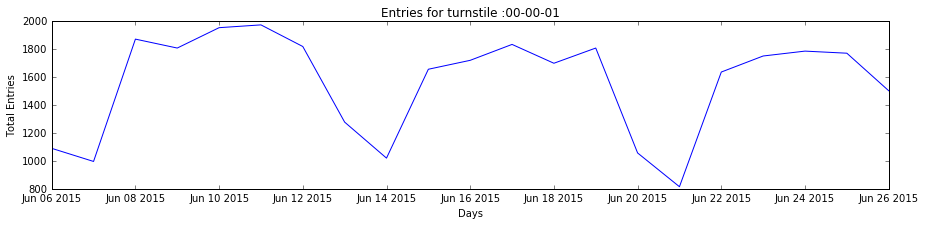

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
turnstile_value = day_counts[key]
dates = [x[0] for x in turnstile_value]
counts = [x[1] for x in turnstile_value]
plt.figure(figsize=(15,3))
plt.title('Entries for turnstile :00-00-01')
plt.xlabel('Days')
plt.ylabel('Total Entries')
plt.plot(dates,counts)

### Challenge 5

In [89]:

groupby_turnstile = defaultdict(list)
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    groupby_turnstile[(turnstile[0],turnstile[1],turnstile[3])] = sorted(by_day.items())

In [90]:
key = list(groupby_turnstile.keys())[0]
print (key)
for i in range(5):
    print (groupby_turnstile[key][i])

('R612', 'R057', 'BARCLAYS CENTER')
(datetime.date(2015, 6, 6), 1325)
(datetime.date(2015, 6, 7), 1121)
(datetime.date(2015, 6, 8), 1540)
(datetime.date(2015, 6, 9), 1574)
(datetime.date(2015, 6, 10), 1534)


### Challenge 6

In [91]:
groupby_station = defaultdict(list)
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    groupby_station[(turnstile[3])] = sorted(by_day.items())

In [92]:
key = list(groupby_station.keys())[0]
print (key)
for i in range(5):
    print (groupby_station[key][i])

HEWES ST
(datetime.date(2015, 6, 6), 903)
(datetime.date(2015, 6, 7), 725)
(datetime.date(2015, 6, 8), 1459)
(datetime.date(2015, 6, 9), 1565)
(datetime.date(2015, 6, 10), 1536)


### Challenge 7

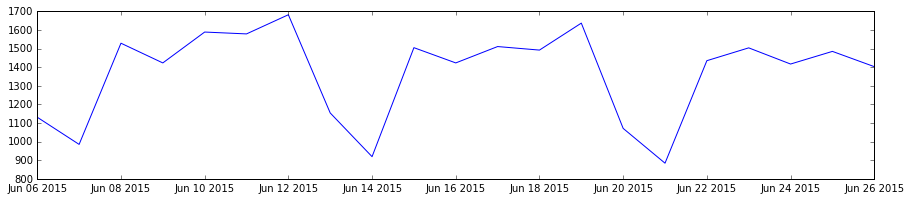

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
values = groupby_station['1 AVE']
values = sorted(values)
dates = [x[0] for x in values]
counts = [x[1] for x in values]
plt.figure(figsize=(15,3))
plt.plot(dates,counts)

### Challenge 8

In [94]:
list1 = values[:7]
list2 = values[7:14]
list3 = values[14:21]
week1 = [x[1] for x in list1]
week2 = [x[1] for x in list2]
week3 = [x[1] for x in list3]

(-0.25, 6.25, 800.0, 1700.0)

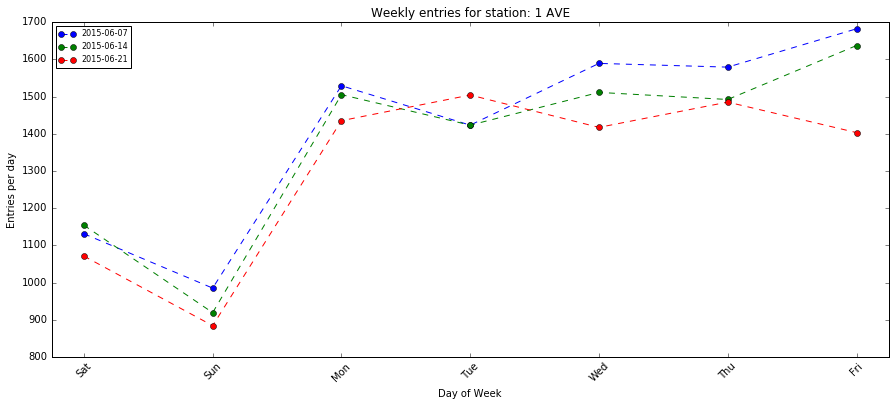

In [95]:
fig = plt.figure(figsize=(15,6))
x = [0,1,2,3,4,5,6]
plt.plot(x,week1,'--bo',label=list1[1][0])
plt.plot(x,week2,'--go',label=list2[1][0])
plt.plot(x,week3,'--ro',label=list3[1][0])

plt.title('Weekly entries for station: 1 AVE')
plt.xlabel('Day of Week')
plt.ylabel('Entries per day')
plt.legend(loc=2,prop={'size':8})


days = ['Sat','Sun','Mon','Tue','Wed','Thu','Fri']
plt.xticks(x, days, rotation=45)
plot_margin = 0.25

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 ,
          y1))

### Challenge 9

In [96]:
total_ridership_counts = defaultdict(list)
for station, rows in groupby_station.items():
    for _, count in rows:
        
        total_ridership_counts[station] = total_ridership_counts.get(station, 0) + count
    

In [97]:
total_ridership_counts = sorted(total_ridership_counts.items(),key = operator.itemgetter(1),reverse=True)


In [98]:
total_ridership_counts[:5]

[('ELMHURST AVE', 94739),
 ('LEXINGTON AVE', 76015),
 ('BEDFORD AVE', 69471),
 ('WOODHAVEN BLVD', 69355),
 ('GRAND ST', 68564)]

### Challenge 10

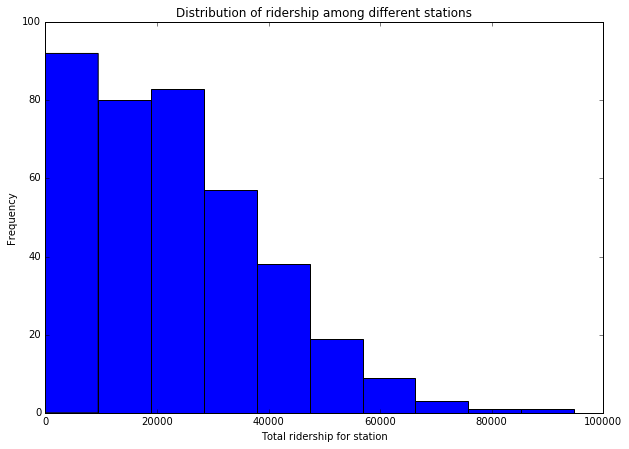

In [99]:
total_ridership_values = [x[1] for x in total_ridership_counts]
plt.figure(figsize=(10,7))
plt.hist(total_ridership_values)
plt.title('Distribution of ridership among different stations')
plt.xlabel('Total ridership for station')
plt.ylabel('Frequency')

<Container object of 10 artists>

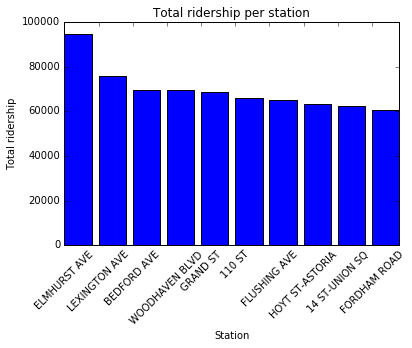

In [100]:
x = range(0,len(total_ridership_counts)+1)
labels= [x[0] for x in total_ridership_counts]
plt.xticks(x, labels, rotation=45)
indices = range(len(total_ridership_values))
plt.title('Total ridership per station')
plt.xlabel('Station')
plt.ylabel('Total ridership')
plt.bar(indices[:10], total_ridership_values[:10])